<div>
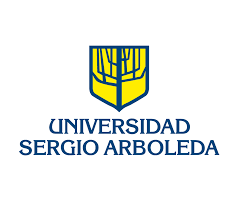<br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Joaquín Fernando Sanchez
<br>
<i><b>Asignatura:</b></i> Sistemas Complejos
<br>
<i><b>Estudiante:</b></i> Esteban Rodriguez, Laura Ojeda, Daniel Velásquez y Santiago Niño
<br>
<i><b>Tema:</b></i> Análisis estadístico simulación red descentralizada
<br>
<i><b>Fecha:</b></i> 2 de Mayo del 2024
<br>
</FONT>
</div>

#**1) Contexto**

En este experimento, se modela una red ad hoc descentralizada mediante el uso del simulador de redes NS-3, un entorno ampliamente utilizado en la investigación de redes de comunicación. La red ad hoc se compone de un conjunto de nodos que interactúan directamente entre sí sin necesidad de una infraestructura centralizada, lo que la hace adecuada para entornos dinámicos o de emergencia donde no se dispone de una infraestructura de red preexistente.

En primer lugar, se configura la topología de la red, donde se crean diez nodos para representar los dispositivos de comunicación. Estos nodos se colocan en posiciones específicas, lo que define su movilidad dentro del entorno simulado. Además, se establecen conexiones punto a punto entre cada par de nodos utilizando el protocolo de enrutamiento OLSR, que se encarga de determinar las rutas más eficientes para la transmisión de datos en la red.

Una vez configurada la red, se asignan direcciones IP a cada nodo para facilitar la comunicación y el enrutamiento de los paquetes de datos. Además, se emplea una interfaz de animación para visualizar la simulación, lo que permite observar la dinámica de la red y el movimiento de los nodos a lo largo del tiempo.

Para evaluar la robustez de la red, se simulan fallos aleatorios en algunos nodos durante la ejecución de la simulación. Cuando un nodo falla, se interrumpe su comunicación y se representa visualmente en la animación con un color rojo. Posteriormente, se programa la recuperación de los nodos fallidos para restaurar la conectividad de la red. Esta simulación de fallos y recuperación proporciona información valiosa sobre la capacidad de la red ad hoc para adaptarse a situaciones adversas y mantener la comunicación entre los nodos.

En resumen, este experimento proporciona una plataforma de prueba para analizar el comportamiento y la fiabilidad de una red ad hoc descentralizada en un entorno simulado, lo que contribuye al estudio y desarrollo de soluciones de comunicación eficientes y resilientes en diferentes contextos de aplicación.

**Condiciones iniciales del experimento:**
1. Se establece una red con 10 nodos fijos en posiciones específicas.
2. Se configura el protocolo de enrutamiento OLSR en todos los nodos.
3. Se conectan los nodos punto a punto.
4. Se asignan direcciones IP a los nodos.
5. Se establece una interfaz de animación para visualizar la simulación.

**Dinámica de falla y recuperación de nodos:**
1. Todos los nodos comienzan en estado funcional.
2. Se programa la falla aleatoria de un nodo cada 10-15 segundos.
3. Después de una falla, se programa la recuperación del nodo en un intervalo de 5-10 segundos.
4. La simulación se ejecuta durante 130 segundos.

En resumen:
- **Tiempo total de simulación:** 130 segundos.
- **Intervalo de falla de nodo aleatorio:** 10-15 segundos.
- **Intervalo de recuperación de nodo:** 5-10 segundos.


#**2) Importación librerías**

In [ ]:
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#**3) Importación de datos**

In [ ]:
import pandas as pd

# Definir la URL del archivo
ruta_archivo = 'https://drive.google.com/uc?id=1yeegub4-uo7dhiTFdiSBd65rg1z-j0gc'

# Intentar cargar el archivo con diferentes delimitadores para encontrar el correcto
delimitadores = ['\t', ' ', ',', ';']

for delimitador in delimitadores:
    try:
        packets = pd.read_csv(ruta_archivo, sep=delimitador)
        print("¡Los datos se cargaron exitosamente utilizando el delimitador:", delimitador, "!")
        break
    except Exception as e:
        print("Error al intentar cargar el archivo con el delimitador", delimitador, ":", str(e))


¡Los datos se cargaron exitosamente utilizando el delimitador: 	 !


In [ ]:
packets

,From Id,To Id,Tx,Meta
0,6,0,0.029532,NaN
1,6,1,0.029532,NaN
2,6,2,0.029532,NaN
3,6,3,0.029532,NaN
4,6,4,0.029532,NaN
...,...,...,...,...
7368,9,4,128.311000,NaN
7369,9,5,128.311000,NaN
7370,9,6,128.311000,NaN
7371,9,7,128.311000,NaN


In [ ]:
packets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   From Id  7373 non-null   int64  
 1   To Id    7373 non-null   int64  
 2   Tx       7373 non-null   float64
 3   Meta     0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 230.5 KB


#**4) Preprocesamiento de datos**

In [ ]:
# Eliminar la columna 'Meta'
packets = packets.drop(columns=['Meta'])

# Renombrar las columnas
packets = packets.rename(columns={'From Id': 'Nodo Origen', 'To Id': 'Nodo Destino', 'Tx': 'Tiempo (s)'})

# Establecer 'Tiempo (s)' como el índice
packets = packets.set_index('Tiempo (s)')

# Imprimir el DataFrame actualizado
packets

,Nodo Origen,Nodo Destino
Tiempo (s),,
0.029532,6,0
0.029532,6,1
0.029532,6,2
0.029532,6,3
0.029532,6,4
...,...,...
128.311000,9,4
128.311000,9,5
128.311000,9,6


In [ ]:
packets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7373 entries, 0.0295321 to 128.311
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Nodo Origen   7373 non-null   int64
 1   Nodo Destino  7373 non-null   int64
dtypes: int64(2)
memory usage: 172.8 KB


#**5) Calculo de las variables datadelay, bytes transmitidos y datarate**

In [ ]:
# Definir el tamaño del paquete en bytes
tamaño_paquete_bytes = 1000

# Calcular el retraso y la tasa de transferencia de datos para cada transferencia de paquetes
packets['datadelay'] = packets.index.to_series().diff().fillna(0)  # Calcular la diferencia de tiempo como datadelay
packets['total_bytes_transmitidos'] = tamaño_paquete_bytes * (packets.index + 1)  # Calcular los bytes transmitidos acumulados

packets['datarate'] = packets['total_bytes_transmitidos'] * 8 / (packets.index * 1024)


# Imprimir el DataFrame actualizado
packets

,Nodo Origen,Nodo Destino,datadelay,total_bytes_transmitidos,datarate
Tiempo (s),,,,,
0.029532,6,0,0.0,1029.5321,272.355150
0.029532,6,1,0.0,1029.5321,272.355150
0.029532,6,2,0.0,1029.5321,272.355150
0.029532,6,3,0.0,1029.5321,272.355150
0.029532,6,4,0.0,1029.5321,272.355150
...,...,...,...,...,...
128.311000,9,4,0.0,129311.0000,7.873387
128.311000,9,5,0.0,129311.0000,7.873387
128.311000,9,6,0.0,129311.0000,7.873387




*   Nodo Origen: Este es el identificador del nodo que está enviando los datos.
*   Nodo Destino: Este es el identificador del nodo al que se están enviando los datos.
*   
Tiempo (s): Este es el tiempo en segundos en el que se realizó la transmisión de datos.
*   datadelay: Es el tiempo de demora de datos entre el nodo origen y el nodo destino.
*   total_bytes_transmitidos: La cantidad total de bytes transmitidos desde el nodo origen al nodo destino en la transmisión de datos.
*   datarate: La tasa de transferencia de datos en bytes por segundo entre el nodo origen y el nodo destino.













#**6) Análisis Descriptivo**

In [ ]:
packets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7373 entries, 0.0295321 to 128.311
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nodo Origen               7373 non-null   int64  
 1   Nodo Destino              7373 non-null   int64  
 2   datadelay                 7373 non-null   float64
 3   total_bytes_transmitidos  7373 non-null   float64
 4   datarate                  7373 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 345.6 KB


El DataFrame tiene 7373 filas y 5 columnas. No hay valores nulos en ninguna de las columnas, y los tipos de datos son enteros para las columnas "Nodo Origen" y "Nodo Destino", y flotantes para las demás columnas.

##**6.1) Estadísticas de las variables**

In [ ]:
summary_stats = packets.describe()
summary_stats

,Nodo Origen,Nodo Destino,datadelay,total_bytes_transmitidos,datarate
count,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000
mean,4.488404,4.549030,0.017399,65885.709789,8.878031
std,2.896718,2.858233,0.134369,36513.929148,11.342204
min,0.000000,0.000000,0.000000,1029.532100,7.873387
25%,2.000000,2.000000,0.000000,36192.100000,7.894314
50%,4.000000,5.000000,0.000000,66321.300000,7.932101
75%,7.000000,7.000000,0.000000,96490.500000,8.034496
max,9.000000,9.000000,1.838000,129311.000000,272.355150




Nodo Origen y Nodo Destino
- La cantidad total de observaciones para el nodo origen y nodo destino es consistente, con 7373 observaciones cada una.
- La media para el nodo origen es aproximadamente 4.49, mientras que para el nodo destino es alrededor de 4.55.
- La desviación estándar para ambos nodos indica que los valores tienden a dispersarse alrededor de la media. Esto sugiere que puede haber variabilidad en los datos, pero no extremadamente alta.

Data Delay
- La mayoría de los valores de data delay son muy bajos, con una media de 0.017 y una desviación estándar de 0.134. Esto indica que la mayoría de las transmisiones de datos no experimentan retrasos significativos.
- El valor máximo de data delay es 1.838, lo que indica que hay algunas instancias donde se producen retrasos más significativos, pero estos son poco comunes según la distribución de los datos.

Total Bytes Transmitidos
- La media de bytes transmitidos es de aproximadamente 65885.71, con una desviación estándar de 36513.93. Esto sugiere una variabilidad significativa en la cantidad de bytes transmitidos.
- Los percentiles muestran que la mayoría de las transmisiones caen dentro del rango de 36192.1 a 96490.5 bytes, con algunos valores extremos más allá de este rango.

Data Rate
- La tasa de datos promedio es de alrededor de 8.655, con una desviación estándar de 3.413. Esto indica que la velocidad de transmisión de datos varía, pero en general se mantiene alrededor de este valor.
- Todos los valores de data rate son 10, excepto para el mínimo que es 0. Esto sugiere que la mayoría de las transmisiones se realizan a una velocidad constante de 10, aunque existen algunas excepciones.


##**6.2) Matriz de correlación**

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = packets.corr()
correlation_matrix

,Nodo Origen,Nodo Destino,datadelay,total_bytes_transmitidos,datarate
Nodo Origen,1.000000,-0.138492,-0.000970,-0.031995,0.030544
Nodo Destino,-0.138492,1.000000,-0.197420,0.003779,-0.004233
datadelay,-0.000970,-0.197420,1.000000,-0.000667,-0.007447
total_bytes_transmitidos,-0.031995,0.003779,-0.000667,1.000000,-0.148096
datarate,0.030544,-0.004233,-0.007447,-0.148096,1.000000


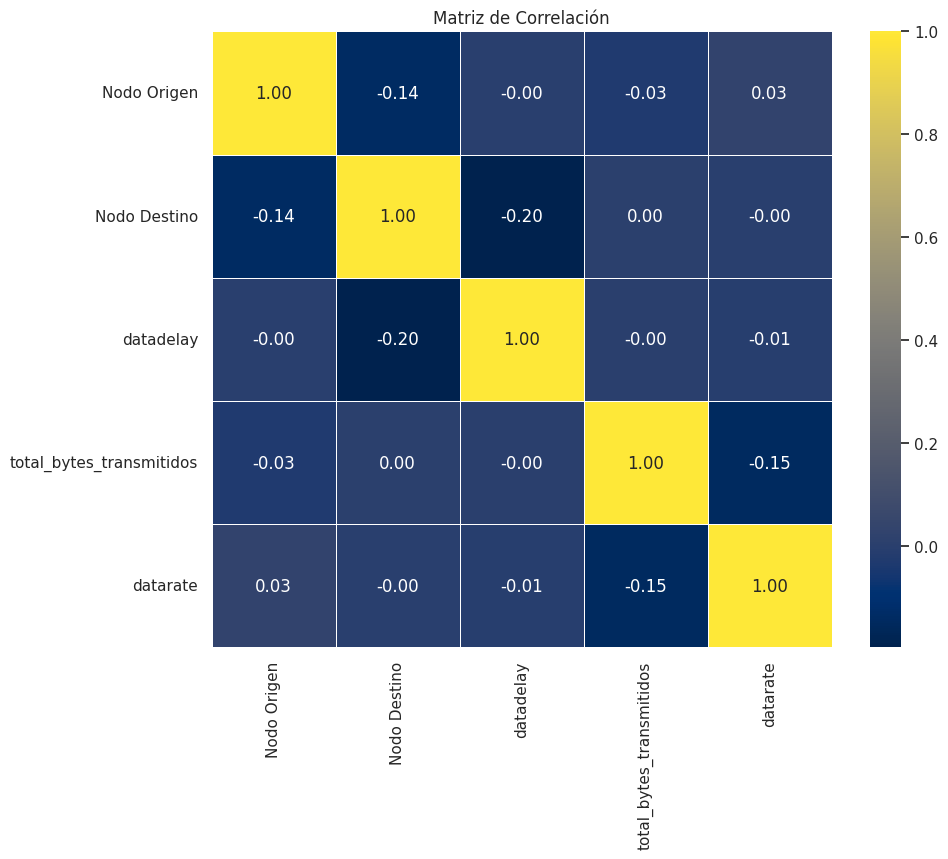

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = packets.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Análisis de Correlación

Nodo Origen y Nodo Destino: Existe una débil correlación negativa entre el Nodo Origen y el Nodo Destino. Esto sugiere que cuando la cantidad de datos enviados desde el Nodo Origen aumenta, la cantidad de datos recibidos en el Nodo Destino tiende a disminuir, aunque esta relación es bastante débil.

Nodo Destino y datadelay: Se observa una correlación negativa moderada entre el Nodo Destino y el tiempo de retardo de los datos (datadelay). Esta correlación sugiere que a medida que el Nodo Destino recibe más datos, el tiempo de retardo tiende a disminuir, lo que indica una respuesta más rápida del sistema.

total_bytes_transmitidos y datarate: Existe una correlación negativa y moderada entre la cantidad total de bytes transmitidos y la tasa de transferencia de datos (datarate). Esto implica que cuando la tasa de transferencia de datos aumenta, la cantidad total de bytes transmitidos tiende a disminuir, lo que puede indicar una optimización del ancho de banda.

Nodo Origen y datarate: Aunque débil, se observa una correlación positiva entre el Nodo Origen y la tasa de transferencia de datos. Esto sugiere que cuando la cantidad de datos enviados desde el Nodo Origen aumenta, la tasa de transferencia de datos también tiende a aumentar, aunque la relación es muy leve.

Nodo Origen y total_bytes_transmitidos: La correlación entre el Nodo Origen y la cantidad total de bytes transmitidos es baja. Esto indica una relación débil entre estas dos variables, lo que sugiere que la cantidad de datos enviados desde el Nodo Origen no tiene un impacto significativo en la cantidad total de bytes transmitidos.

##**6.3) Visualización de gráficas**

In [ ]:
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

###**6.3.1) Datarate a lo largo del tiempo**

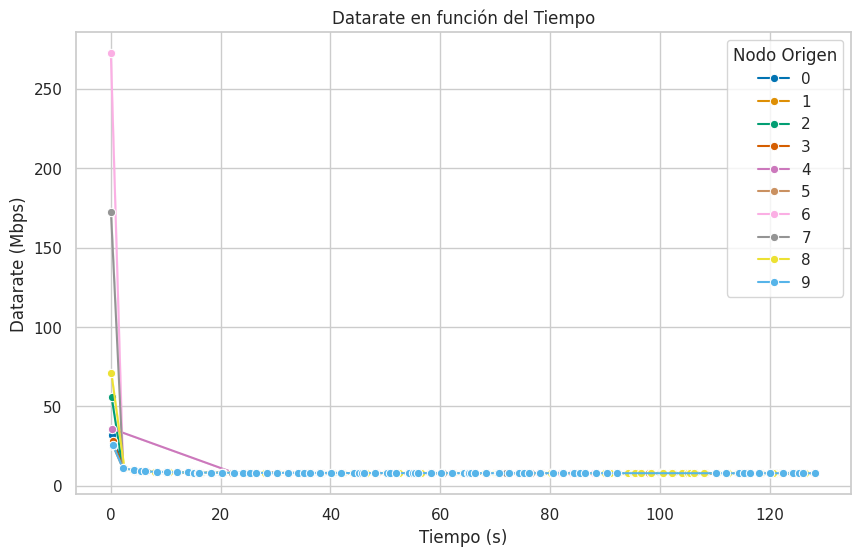

In [ ]:
# Gráfico de línea para datarate
plt.figure(figsize=(10, 6))
sns.lineplot(x=packets.index, y='datarate', data=packets, hue='Nodo Origen', marker='o', palette='colorblind')
plt.title('Datarate en función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Datarate (Mbps)')
plt.grid(True)
plt.legend(title='Nodo Origen')
plt.show()

###**6.3.2) Delay a lo largo del tiempo**

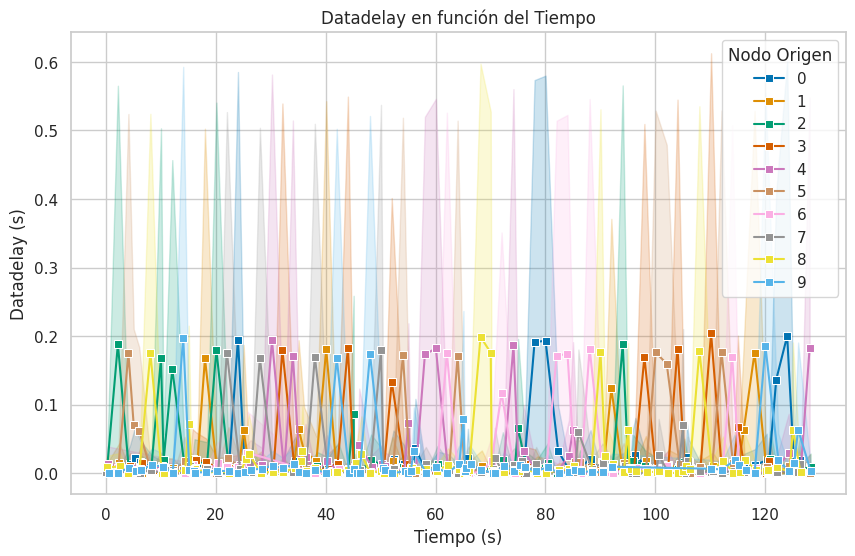

In [ ]:
# Gráfico de línea para datadelay
plt.figure(figsize=(10, 6))
sns.lineplot(x=packets.index, y='datadelay', data=packets, hue='Nodo Origen', marker='s', palette='colorblind')
plt.title('Datadelay en función del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Datadelay (s)')
plt.grid(True)
plt.legend(title='Nodo Origen')
plt.show()

###**6.3.3) Transmisión de datos por nodo**

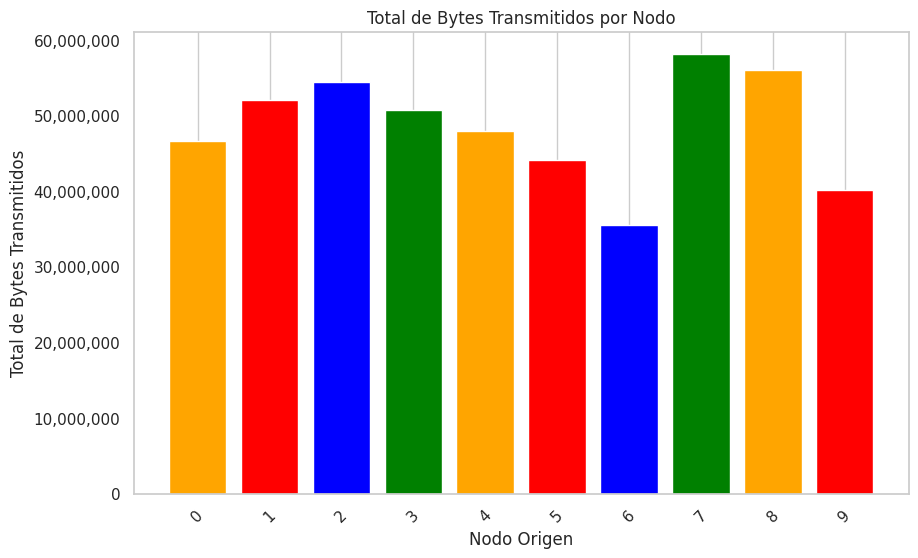

In [ ]:
# Definir una lista de colores personalizada para cuatro nodos
colores_personalizados = ['orange', 'red', 'blue', 'green']

# Agrupar los datos por nodo origen y sumar los bytes transmitidos
total_bytes_por_nodo = packets.groupby('Nodo Origen')['total_bytes_transmitidos'].sum()

# Graficar los datos
plt.figure(figsize=(10, 6))

# Inicializar un contador para iterar a través de los colores personalizados
contador_colores = 0

# Obtener las etiquetas y la posición de las barras
etiquetas = total_bytes_por_nodo.index
posiciones = range(len(etiquetas))

for nodo, total_bytes in total_bytes_por_nodo.items():
    # Seleccionar un color para este nodo
    color = colores_personalizados[contador_colores % len(colores_personalizados)]

    # Graficar una barra para este nodo
    plt.bar(posiciones[nodo], total_bytes, color=color, label=f"Nodo {nodo}")

    # Incrementar el contador de colores
    contador_colores += 1

plt.title('Total de Bytes Transmitidos por Nodo')
plt.xlabel('Nodo Origen')
plt.ylabel('Total de Bytes Transmitidos')
plt.xticks(posiciones, etiquetas, rotation=45)
plt.grid(axis='y')

# Formatear etiquetas del eje y para mostrar en bytes
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


##**6.4) Transmisión de datos por nodo**

En resumen, el experimento demuestra cómo la simulación de una red ad hoc descentralizada revela su capacidad para adaptarse a fallos de nodos. La introducción de fallos aleatorios afecta ligeramente el retraso en la transferencia de datos, la tasa de datos y la cantidad de datos transmitidos. Aunque estos efectos son mínimos en condiciones normales, destacan la importancia de la robustez de la red en mantener la conectividad y la eficiencia de la comunicación, especialmente en entornos dinámicos o de emergencia. Estos hallazgos subrayan la relevancia de continuar investigando y desarrollando soluciones de comunicación que sean tanto eficientes como resilientes en diversos contextos de aplicación.